### Exemplo Prático de uma Rede Neural com Keras e TensorFlow

Neste exemplo prático, vamos construir e treinar uma rede neural simples para classificar imagens de dígitos manuscritos usando o conjunto de dados MNIST. O MNIST é um dos conjuntos de dados mais utilizados em aprendizado de máquina e visão computacional, composto por imagens de dígitos manuscritos (0 a 9).

#### Passos do Exemplo:

1. **Importar Bibliotecas Necessárias:**
   Primeiro, importamos as bibliotecas necessárias, incluindo TensorFlow e Keras para construção e treinamento da rede neural, e Matplotlib para visualização das imagens.

2. **Carregar e Preparar os Dados:**
   Carregamos o conjunto de dados MNIST, que contém 60.000 imagens de treinamento e 10.000 imagens de teste. As imagens são normalizadas para que os valores dos pixels estejam entre 0 e 1. Além disso, os rótulos são convertidos para o formato one-hot, necessário para a saída da rede neural.

3. **Construir o Modelo da Rede Neural:**
   Construímos um modelo sequencial de rede neural. Este modelo inclui:
   - Uma camada de achatamento (`Flatten`) que transforma as imagens de 28x28 pixels em vetores de 784 elementos.
   - Uma camada densa (`Dense`) oculta com 128 neurônios e função de ativação ReLU.
   - Uma camada de saída (`Dense`) com 10 neurônios (um para cada dígito) e função de ativação softmax.

4. **Compilar o Modelo:**
   Compilamos o modelo especificando o otimizador Adam, a função de perda de entropia cruzada categórica e a métrica de precisão. A função de perda ajuda o modelo a medir o quão bem ele está fazendo durante o treinamento, enquanto a métrica de precisão nos dá uma ideia de quão bem o modelo está performando.

5. **Treinar o Modelo:**
   Treinamos o modelo com 5 épocas, usando um tamanho de lote de 32. Durante o treinamento, também validamos o modelo com o conjunto de dados de teste para monitorar a performance e evitar overfitting.

6. **Avaliar o Modelo:**
   Após o treinamento, avaliamos a precisão do modelo no conjunto de dados de teste. Isso nos dá uma ideia de quão bem o modelo generaliza para novos dados.

7. **Fazer Previsões:**
   Usamos o modelo treinado para prever os rótulos das imagens de teste. Em seguida, visualizamos algumas dessas imagens junto com suas previsões e rótulos verdadeiros, para verificar a performance do modelo.

#### Visualização das Imagens:
Para uma melhor compreensão dos resultados, exibimos algumas imagens de teste com suas respectivas previsões feitas pelo modelo. Isso nos permite ver onde o modelo acertou e onde errou, ajudando na análise qualitativa da performance do modelo.

Este exemplo prático demonstra os passos essenciais para construir, treinar e avaliar uma rede neural simples utilizando Keras e TensorFlow, fornecendo uma base sólida para tarefas de classificação de imagens.


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [5]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax'))

c:\Users\rodri\OneDrive\Documentos\Ia&DataScience\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compilar o Modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_data=(x_test, y_test_cat))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8798 - loss: 0.4241 - val_accuracy: 0.9612 - val_loss: 0.1276
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9676 - loss: 0.1153 - val_accuracy: 0.9694 - val_loss: 0.0972
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9779 - loss: 0.0746 - val_accuracy: 0.9723 - val_loss: 0.0892
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9837 - loss: 0.0539 - val_accuracy: 0.9758 - val_loss: 0.0757
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9873 - loss: 0.0410 - val_accuracy: 0.9752 - val_loss: 0.0780


In [8]:
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9709 - loss: 0.0931
Acurácia no conjunto de teste: 97.52%


In [9]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step


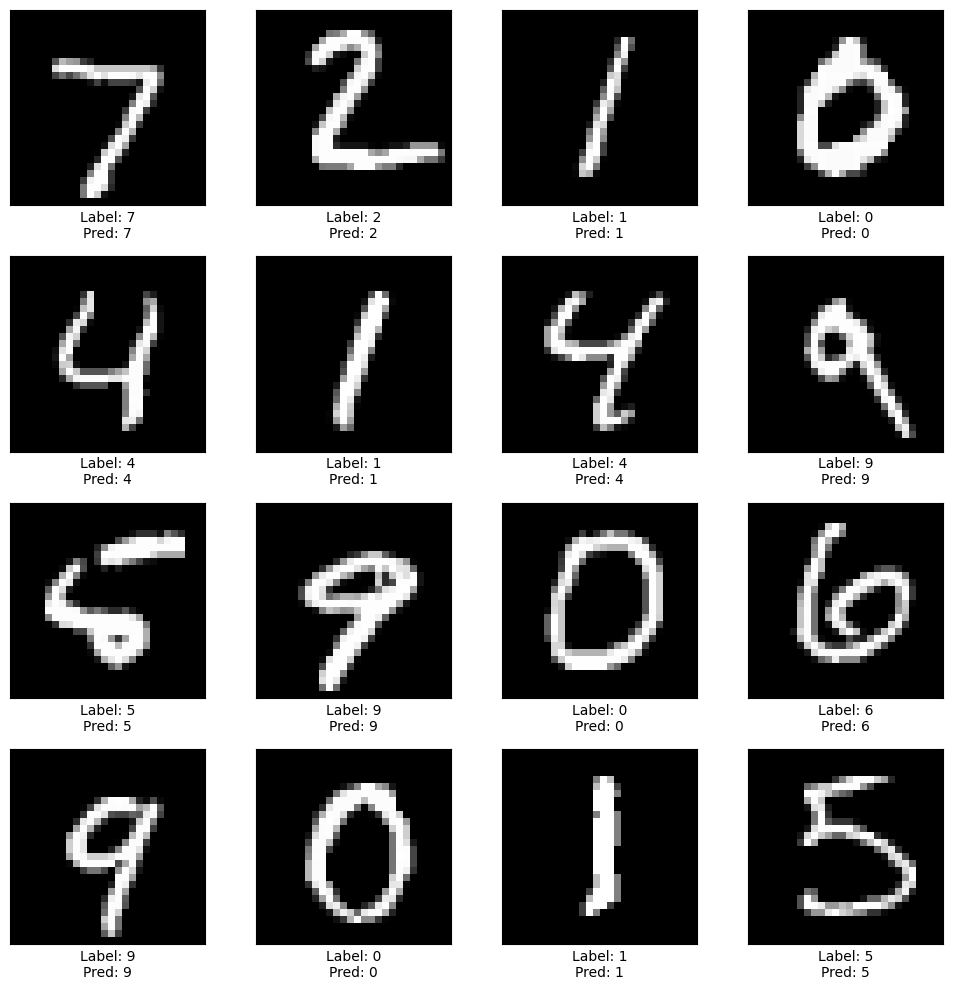

In [15]:
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        if predictions is None:
            plt.xlabel(f"Label: {labels[i]}")
        else:
            plt.xlabel(f"Label: {labels[i]}\nPred: {np.argmax(predictions[i])}")
    plt.tight_layout()
    plt.show()

plot_images(x_test, y_test, predictions)
